In [2]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access to M1 processor
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.7.0


In [3]:
import json
import pandas as pd
from datetime import datetime, timedelta

# Exemples d'OrderBooks

In [4]:
df = pd.read_csv("./database/AAVEUSDT_binance_orderbook_full.csv")

In [5]:
df.head()

,timestamp,symbol,ask_price_0,ask_qty_0,bid_price_0,bid_qty_0,ask_price_1,ask_qty_1,bid_price_1,bid_qty_1,...,bid_price_97,bid_qty_97,ask_price_98,ask_qty_98,bid_price_98,bid_qty_98,ask_price_99,ask_qty_99,bid_price_99,bid_qty_99
0,1649263141895,AAVEUSDT,194.78,0.2,194.73,5.0,194.79,4.3,194.71,9.5,...,193.66,18.2,195.88,15.4,193.65,20.4,195.90,6.1,193.64,15.1
1,1649263200735,AAVEUSDT,193.67,3.1,193.60,384.7,193.69,0.8,193.58,1.5,...,192.46,3.7,194.81,0.7,192.45,1.0,194.82,1.2,192.44,143.2
2,1649263260702,AAVEUSDT,195.17,2.6,195.12,0.5,195.18,7.9,195.10,1.0,...,193.94,2.0,196.27,27.7,193.93,2.3,196.29,63.1,193.92,1.3
3,1649263320761,AAVEUSDT,193.83,1.5,193.80,0.4,193.84,8.0,193.79,0.1,...,192.76,16.1,194.86,29.4,192.75,2.5,194.87,3.2,192.74,5.9
4,1649263381163,AAVEUSDT,194.31,2.2,194.30,6.9,194.34,5.2,194.29,7.0,...,193.19,8.2,195.42,7.1,193.18,11.9,195.43,32.8,193.17,10.8


## Calcul du slippage (buy side) le 2022-04-06 16:47:00

In [6]:
df['timestamp'] = df['timestamp'] - df['timestamp']%10000
df['open_time'] = pd.to_datetime(df['timestamp'], unit='ms')

In [7]:
df.head(10)

,timestamp,symbol,ask_price_0,ask_qty_0,bid_price_0,bid_qty_0,ask_price_1,ask_qty_1,bid_price_1,bid_qty_1,...,bid_qty_97,ask_price_98,ask_qty_98,bid_price_98,bid_qty_98,ask_price_99,ask_qty_99,bid_price_99,bid_qty_99,open_time
0,1649263140000,AAVEUSDT,194.78,0.2,194.73,5.0,194.79,4.3,194.71,9.5,...,18.2,195.88,15.4,193.65,20.4,195.90,6.1,193.64,15.1,2022-04-06 16:39:00
1,1649263200000,AAVEUSDT,193.67,3.1,193.60,384.7,193.69,0.8,193.58,1.5,...,3.7,194.81,0.7,192.45,1.0,194.82,1.2,192.44,143.2,2022-04-06 16:40:00
2,1649263260000,AAVEUSDT,195.17,2.6,195.12,0.5,195.18,7.9,195.10,1.0,...,2.0,196.27,27.7,193.93,2.3,196.29,63.1,193.92,1.3,2022-04-06 16:41:00
3,1649263320000,AAVEUSDT,193.83,1.5,193.80,0.4,193.84,8.0,193.79,0.1,...,16.1,194.86,29.4,192.75,2.5,194.87,3.2,192.74,5.9,2022-04-06 16:42:00
4,1649263380000,AAVEUSDT,194.31,2.2,194.30,6.9,194.34,5.2,194.29,7.0,...,8.2,195.42,7.1,193.18,11.9,195.43,32.8,193.17,10.8,2022-04-06 16:43:00
5,1649263440000,AAVEUSDT,195.52,0.2,195.50,7.2,195.54,17.5,195.49,8.6,...,32.0,196.61,7.8,194.42,0.1,196.62,23.8,194.41,11.0,2022-04-06 16:44:00
6,1649263500000,AAVEUSDT,195.73,0.8,195.70,6.7,195.76,1.1,195.69,6.6,...,5.1,196.77,7.3,194.62,17.8,196.78,27.0,194.61,1.2,2022-04-06 16:45:00
7,1649263560000,AAVEUSDT,194.87,10.6,194.85,0.7,194.88,0.3,194.84,0.1,...,2.9,195.92,2.7,193.74,58.4,195.93,11.2,193.73,21.0,2022-04-06 16:46:00
8,1649263620000,AAVEUSDT,194.63,0.1,194.61,3.4,194.65,4.9,194.59,2.6,...,4.0,195.65,17.7,193.57,0.3,195.66,10.9,193.56,13.3,2022-04-06 16:47:00
9,1649263680000,AAVEUSDT,194.54,0.5,194.53,5.0,194.56,5.1,194.52,12.4,...,9.5,195.60,15.5,193.52,20.0,195.61,10.3,193.51,36.1,2022-04-06 16:48:00


In [8]:
def get_all_price_qty(df,
                      ts,
                      side='ask'):
        
        all_ask_price = []
        all_ask_qty_usdt = []
        
        row = df[df['timestamp'] == ts]
        
        for i in range(99):

            price = row[f'ask_price_{i}'].to_list()[0]
            qty = row[f'ask_qty_{i}'].to_list()[0]
            all_ask_price.append(price)
            all_ask_qty_usdt.append(round(qty * price, 2))
            
        return all_ask_price, all_ask_qty_usdt
            
all_ask_price, all_ask_qty_usdt = get_all_price_qty(df, 1649263620000, side='ask')

In [9]:
print(all_ask_price[:10])
print(all_ask_qty_usdt[:10])

[194.63, 194.65, 194.66, 194.67, 194.68, 194.69, 194.7, 194.71, 194.72, 194.73]
[19.46, 953.79, 1051.16, 720.28, 934.46, 12051.31, 2570.04, 12130.43, 739.94, 2064.14]


In [10]:
def compute_slippage(all_price, 
                     all_qty_usdt, 
                     amount):
    
    residual_amount = amount
    avg_price = 0
    first_price = all_price[0]
    
    for i in range(len(all_price)):
        
        if residual_amount <= all_qty_usdt[i]:
            avg_price += residual_amount * all_price[i]
            break
            
        else:
            avg_price += all_qty_usdt[i] * all_price[i]
            residual_amount -= all_qty_usdt[i]
            
    avg_price = avg_price / amount
    
    slippage = 100 * (max(avg_price, first_price) / min(avg_price, first_price) - 1)
    
    return slippage
        
slippage = compute_slippage(all_ask_price, all_ask_qty_usdt, 5000)

## Afficher le graph du slippage en fonction de la quantité

In [11]:
import matplotlib.pyplot as plt

In [16]:
list_amounts = [i for i in range(10, 10000 ,10)]
list_slippage = []

for amount in list_amounts:
    
    list_slippage.append(compute_slippage(all_ask_price, all_ask_qty_usdt, amount))

print(list_amounts[:10])
print(list_slippage[:10])

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.0, 0.00027744951960340103, 0.0036102690575301466, 0.005276678826504622, 0.006276524687875984, 0.006943088595456892, 0.007419205672309914, 0.00777629347994413, 0.008054028441417671, 0.008276216410618709]


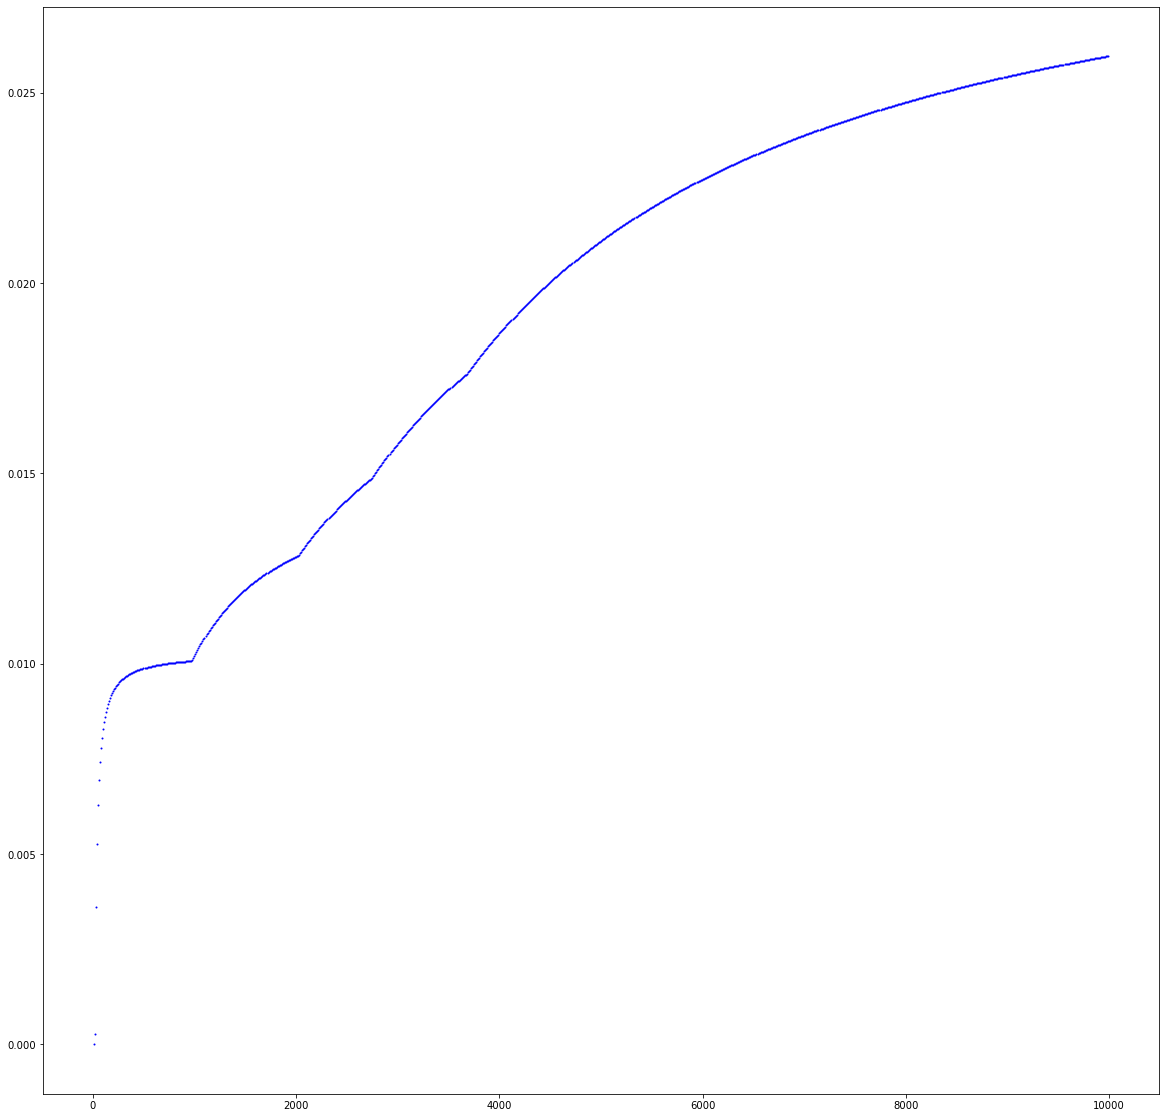

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(list_amounts, list_slippage, s=1,facecolor='blue')

## Another example (XPRUSDT)

In [33]:
df = pd.read_csv("./database/IOTAUSDT_binance_orderbook_full.csv")
df['timestamp'] = df['timestamp'] - df['timestamp']%10000
df['open_time'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.drop_duplicates()
df.tail(100)

,timestamp,symbol,ask_price_0,ask_qty_0,bid_price_0,bid_qty_0,ask_price_1,ask_qty_1,bid_price_1,bid_qty_1,...,bid_qty_97,ask_price_98,ask_qty_98,bid_price_98,bid_qty_98,ask_price_99,ask_qty_99,bid_price_99,bid_qty_99,open_time
6382,1651747800000,IOTAUSDT,0.5523,5002.6,0.5520,672.5,0.5524,4286.3,0.5519,5022.6,...,1866.8,0.5627,18378.7,0.5408,5544.6,0.5628,5893.0,0.5407,22.1,2022-05-05 10:50:00
6385,1651747860000,IOTAUSDT,0.5525,76.1,0.5524,982.6,0.5526,234.9,0.5523,3299.4,...,9.9,0.5628,5893.0,0.5414,1670.5,0.5629,14626.3,0.5413,20511.4,2022-05-05 10:51:00
6388,1651747920000,IOTAUSDT,0.5528,1332.8,0.5527,178.1,0.5529,2493.3,0.5526,48.5,...,229.0,0.5631,219.9,0.5420,4581.4,0.5632,351.3,0.5419,9533.9,2022-05-05 10:52:00
6391,1651747980000,IOTAUSDT,0.5528,1365.0,0.5527,45.7,0.5529,5709.8,0.5526,800.0,...,4581.4,0.5632,351.3,0.5419,9533.9,0.5633,42929.1,0.5418,9226.9,2022-05-05 10:53:00
6394,1651748040000,IOTAUSDT,0.5523,12589.3,0.5522,1576.0,0.5524,6204.0,0.5521,8748.7,...,9.3,0.5626,280.3,0.5413,5767.2,0.5627,18360.9,0.5412,123.9,2022-05-05 10:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,1651753500000,IOTAUSDT,0.5480,127.5,0.5479,4790.9,0.5481,46.3,0.5478,1472.9,...,9117.0,0.5591,17.9,0.5372,49287.3,0.5592,362.0,0.5370,13595.1,2022-05-05 12:25:00
6670,1651753560000,IOTAUSDT,0.5485,2538.7,0.5484,500.0,0.5486,6527.9,0.5482,5100.4,...,38.3,0.5597,28914.1,0.5379,5861.5,0.5598,10009.0,0.5377,11568.0,2022-05-05 12:26:00
6673,1651753620000,IOTAUSDT,0.5488,15.2,0.5486,2503.5,0.5490,2452.0,0.5485,5829.6,...,9161.0,0.5599,17817.3,0.5382,6929.2,0.5600,47171.8,0.5381,9.7,2022-05-05 12:27:00
6676,1651753680000,IOTAUSDT,0.5500,1910.3,0.5499,130.3,0.5501,7871.6,0.5498,153.5,...,9264.4,0.5608,10000.0,0.5395,1889.1,0.5609,47.3,0.5394,9911.9,2022-05-05 12:28:00


Text(0.5, 1.0, 'slippage = f(position_size)')

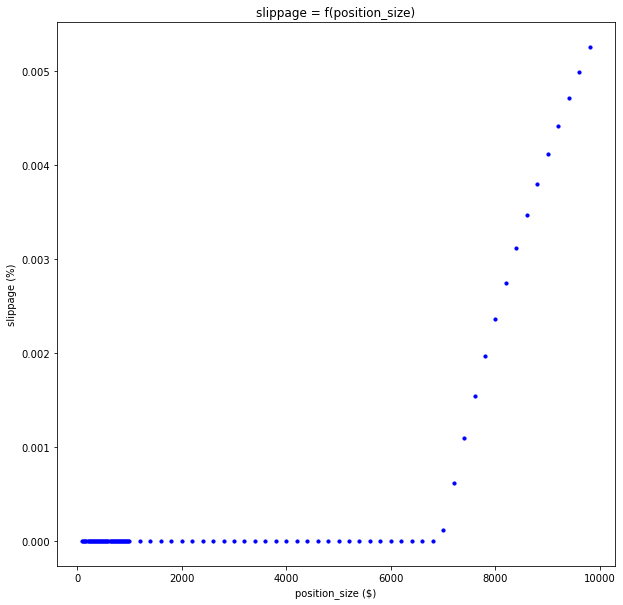

In [39]:
all_ask_price, all_ask_qty_usdt = get_all_price_qty(df, 1651748040000, side='ask')

list_amounts = [i for i in range(100, 1000,20)] + [i for i in range(1000, 10000,200)]
list_slippage = []

for amount in list_amounts:
    
    list_slippage.append(compute_slippage(all_ask_price, all_ask_qty_usdt, amount))

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list_amounts, list_slippage, s=10,facecolor='blue')
plt.xlabel('position_size ($)')
plt.ylabel('slippage (%)')
plt.title('slippage = f(position_size)')

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly = PolynomialFeatures(degree = 1)

poly_features = poly.fit_transform(np.array([list_amounts]).transpose())

poly_reg_model = LinearRegression(fit_intercept=False)

poly_reg_model.fit(poly_features, list_slippage)

y_predicted = poly_reg_model.predict(poly_features)

In [ ]:
y_predicted[0]

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(list_amounts, list_slippage, s=1, facecolor='blue', label='real slippage')
plt.plot(list_amounts, y_predicted, c='red', label='regression prediction')
plt.legend()
plt.show()

In [ ]:
_, beta1 = poly_reg_model.coef_

In [ ]:
beta0 = poly_reg_model.intercept_

In [ ]:
print([beta0, beta1])

# Create all the coefficient for each rows

## Creation of the dataframe containing all datas

In [ ]:
from os import walk

filenames = next(walk("./database/"), (None, None, []))[2]
filenames.remove('.DS_Store')

df_dataset = pd.DataFrame()

In [ ]:
def compute_slippage(all_price, 
                     all_qty, 
                     amount_usdt):
    
    residual_amount = amount_usdt
    avg_price = 0
    first_price = all_price[0]
    
    for i in range(len(all_price)):
        
        qty_usdt = all_qty[i] * all_price[i]
        
        if residual_amount <= qty_usdt:
            avg_price += residual_amount * all_price[i]
            break
            
        else:
            avg_price += qty_usdt * all_price[i]
            residual_amount -= qty_usdt
            
    avg_price = avg_price / amount_usdt
    
    slippage = 100 * (max(avg_price, first_price) / min(avg_price, first_price) - 1)
    
    return slippage

def compute_coefficients(list_amounts,
                         list_slippage):
    
    poly = PolynomialFeatures(degree = 1)

    poly_features = poly.fit_transform(np.array([list_amounts]).transpose())

    poly_reg_model = LinearRegression()

    poly_reg_model.fit(poly_features, list_slippage)

    _, beta1 = poly_reg_model.coef_
    
    beta0 = poly_reg_model.intercept_
    
    return beta0, beta1
    

def compute_slippage_regression(row):
    
    ask_prices = row[[f'ask_price_{i}' for i in range(100)]].to_list()
    bid_prices = row[[f'bid_price_{i}' for i in range(100)]].to_list()
    ask_qty = row[[f'ask_qty_{i}' for i in range(100)]].to_list()
    bids_qty = row[[f'bid_qty_{i}' for i in range(100)]].to_list()
    
    list_amounts = [5000, 10000]
    list_slippage_buy = []
    list_slippage_sell = []

    for amount in list_amounts:

        list_slippage_buy.append(compute_slippage(ask_prices, ask_qty, amount))
        list_slippage_sell.append(compute_slippage(bid_prices, bids_qty, amount))
        
#     beta0, beta1 = compute_coefficients(list_amounts,
#                                                list_slippage_buy)
    
    row['beta0_buy'], row['beta1_buy'] = list_slippage_buy[0], list_slippage_buy[1]
    
#     beta0, beta1 = compute_coefficients(list_amounts,
#                                                list_slippage_sell)
    
    row['beta0_sell'], row['beta1_sell'] = list_slippage_sell[0], list_slippage_sell[1]

    return row


for files in filenames:
    
    pair = files[:-27]
    
    print(f"Processing {pair}...")
    
    try:
        historical_data = pd.read_csv(f"../../../nova-algo/database/futures/hist_{pair}_1m.csv")
        historical_data['last_24h_volume'] = historical_data['quote_asset_volume'].rolling(min_periods=1, window=60*24).sum()
        historical_data = historical_data.dropna()
    except:
        print("Error while processing")
        continue
        
    
    
    df = pd.read_csv("./database/" + files)
    df['timestamp'] = df['timestamp'] - df['timestamp']%10000
    df['open_time'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    df['beta0_buy'], df['beta1_buy'], df['beta2_buy'] = np.nan, np.nan, np.nan
    df['beta0_sell'], df['beta1_sell'], df['beta2_sell'] = np.nan, np.nan, np.nan
    
    df = df.apply(lambda row: compute_slippage_regression(row),
                  axis=1)
    
    df_buy = df.copy(deep=True)[['symbol', 'open_time', 'beta0_buy', 'beta1_buy']]
    df_buy = df_buy.rename(columns={"beta0_buy": "beta0", "beta1_buy": "beta1"})
    df_buy['side'] = 'buy'
    
    df_sell = df.copy(deep=True)[['symbol', 'open_time', 'beta0_sell', 'beta1_sell']]
    df_sell = df_sell.rename(columns={"beta0_sell": "beta0", "beta1_sell": "beta1"})
    df_sell['side'] = 'sell'
    
    df = pd.concat([df_buy, df_sell])
    
    df = df.sort_values(by='open_time') 
    
    historical_data['type'] = np.where(historical_data['close'] > historical_data['open'], 1, 0)
    historical_data['size'] = historical_data['high'] / historical_data['low'] - 1
    historical_data['open_time'] = pd.to_datetime(historical_data['open_time'])
    
    columns_to_merge = ['open_time', 'quote_asset_volume', 'nb_of_trades', 'taker_quote_volume', 
                       'type', 'size', 'last_24h_volume']
    
    df = pd.merge(df, historical_data[columns_to_merge], how="left",
                  left_on=["open_time"], right_on=["open_time"])
    
    df_dataset = pd.concat([df_dataset, df])
    
    df_dataset = df_dataset.dropna()
    

In [ ]:
df_dataset = df_dataset.drop_duplicates()
df_dataset.to_csv('./full_dataset_3_0_10k.csv')
df_dataset.shape

In [ ]:
df_dataset.head()

## Create and split train, valid and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_entry_train = df_dataset[['side', 'quote_asset_volume', 'taker_quote_volume', 'nb_of_trades', 'type', 'size']]
df_entry_train['side'] = np.where(df_entry_train['side'] == 'buy', 1, 0)
df_outputs_train = df_dataset[['beta0', 'beta1', 'beta2']]

X_train, X_valid, y_train, y_valid = train_test_split(df_entry_train, df_outputs_train, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, random_state=69)

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
y_train.head()

## Scale train dataset

In [ ]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)

In [ ]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)

## Scale valid and test

In [ ]:
X_test, X_valid = scaler_x.fit_transform(X_test), scaler_x.fit_transform(X_valid)

In [ ]:
y_test, y_valid = scaler_y.fit_transform(y_test), scaler_y.fit_transform(y_valid)

# Create model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(3),
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss='mse')

model.build(input_shape=(None,6,1))



In [ ]:
model.summary()


In [ ]:
model.fit(X_train, y_train, epochs=3)